In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

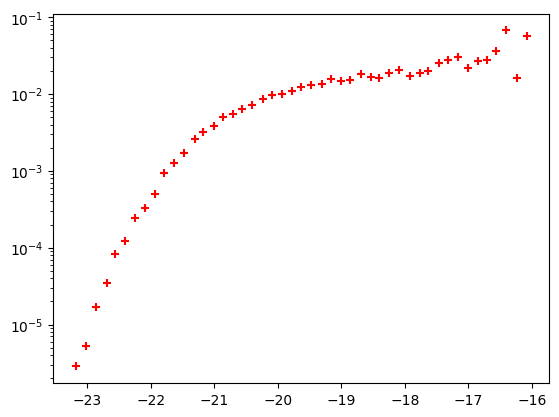

In [2]:
datos = pd.read_csv('data.csv')
magnitud = datos.iloc[:, 0]
funcionlum = datos.iloc[:, 1]
plt.scatter(magnitud, funcionlum, marker='+', color='red')
plt.yscale('log')

In [3]:
def	schechter(x,M,phi,alpha):
				m = 0.4*np.log(10)*phi*(10**(-0.4*(x-M)*(alpha+1)))*np.exp(-10**(-0.4*(x-M)))
				return m

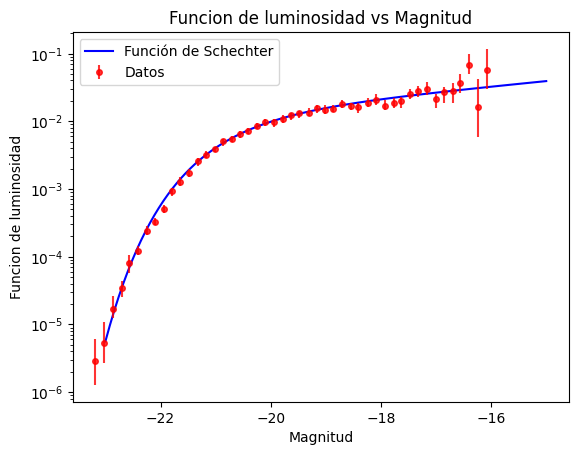

In [4]:
xgraf = np.linspace(-23, -15, 100)
ygraf = schechter(xgraf, -20.83, 1.46*(10**-2), -1.2)

erromin = datos.iloc[:,2]
erromax = datos.iloc[:,3]


plt.plot(xgraf, ygraf, label='Función de Schechter', color='blue')
plt.errorbar(magnitud,funcionlum,yerr=[erromin, erromax],color='red', alpha=0.8, fmt='o', label='Datos', markersize=4)
plt.yscale('log')
plt.xlabel('Magnitud')
plt.ylabel('Funcion de luminosidad')
plt.title('Funcion de luminosidad vs Magnitud')
plt.legend()
plt.show()

Ahora, probamos variando los parámetros, uno a la vez, para ver como afectan al resultado:

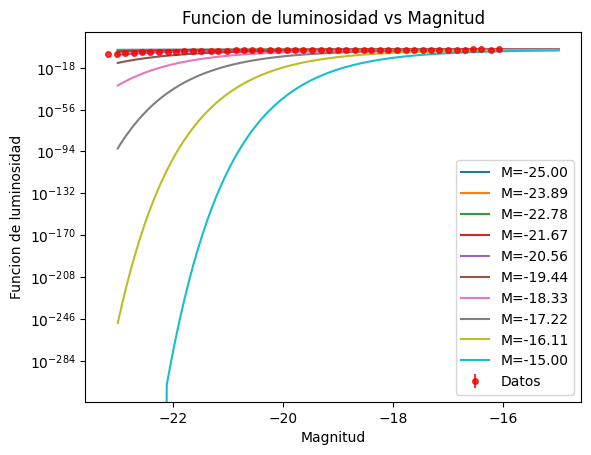

In [5]:
xgraf = np.linspace(-23, -15, 100)
#Variamos M
for M in np.linspace(-25, -15, 10):
	ygraf = schechter(xgraf, M, 1.46*(10**-2), -1.2)
	plt.plot(xgraf, ygraf, label=f'M={M:.2f}')

erromin = datos.iloc[:, 2]
erromax = datos.iloc[:, 3]

plt.errorbar(magnitud, funcionlum, yerr=[erromin, erromax], color='red', alpha=0.8, fmt='o', label='Datos', markersize=4)
plt.yscale('log')
plt.xlabel('Magnitud')
plt.ylabel('Funcion de luminosidad')
plt.title('Funcion de luminosidad vs Magnitud')
plt.legend()
plt.show()


Me zarpé, reduzcamos:

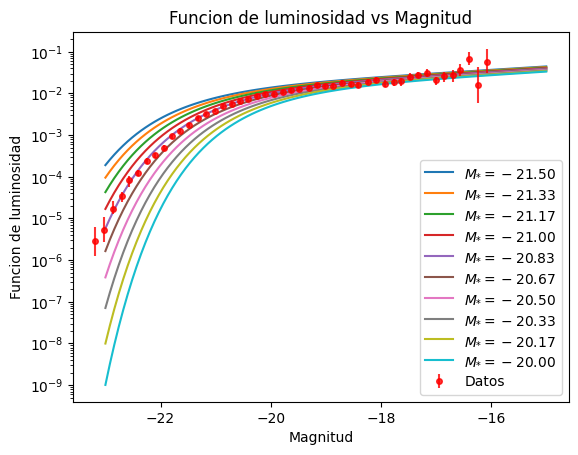

In [19]:
xgraf = np.linspace(-23, -15, 100)
#Variamos M
for M in np.linspace(-21.5, -20, 10):
	ygraf = schechter(xgraf, M, 1.46*(10**-2), -1.2)
	plt.plot(xgraf, ygraf, label=f'$M_{{*}}={M:.2f}$')

erromin = datos.iloc[:, 2]
erromax = datos.iloc[:, 3]

plt.errorbar(magnitud, funcionlum, yerr=[erromin, erromax], color='red', alpha=0.8, fmt='o', label='Datos', markersize=4)
plt.yscale('log')
plt.xlabel('Magnitud')
plt.ylabel('Funcion de luminosidad')
plt.title('Funcion de luminosidad vs Magnitud')
plt.legend()
plt.show()

Es razonable, entonces, entre -21 y -20.6 irá M

Ahora, veamos $\phi$

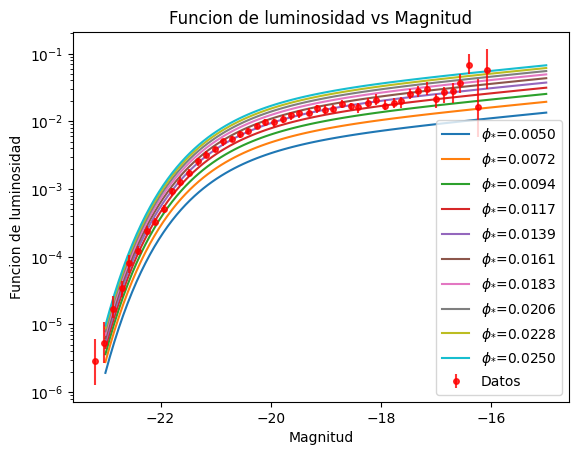

In [20]:
xgraf = np.linspace(-23, -15, 100)
#Variamos phi
for phi in np.linspace(0.5*(10**-2), 2.5*(10**-2), 10):
	ygraf = schechter(xgraf, -20.83, phi, -1.2)
	plt.plot(xgraf, ygraf, label=f'$\phi_{{*}}$={phi:.4f}')

erromin = datos.iloc[:, 2]
erromax = datos.iloc[:, 3]

plt.errorbar(magnitud, funcionlum, yerr=[erromin, erromax], color='red', alpha=0.8, fmt='o', label='Datos', markersize=4)
plt.yscale('log')
plt.xlabel('Magnitud')
plt.ylabel('Funcion de luminosidad')
plt.title('Funcion de luminosidad vs Magnitud')
plt.legend()
plt.show()

Razonable, por lo tanto $\phi \in [1.2,1.6]10^{-2}$

Finalmente, veamos $\alpha$

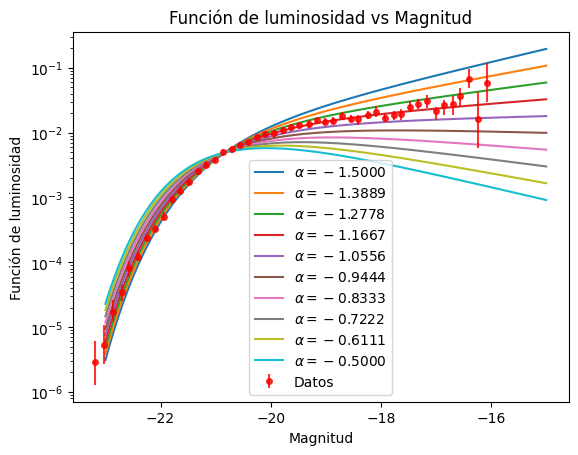

In [8]:
xgraf = np.linspace(-23, -15, 100)
# Variamos alpha
for alpha in np.linspace(-1.5, -0.5, 10):
	ygraf = schechter(xgraf, -20.83, 1.46*(10**-2), alpha)
	plt.plot(xgraf, ygraf, label=f'$\\alpha={alpha:.4f}$')

erromin = datos.iloc[:, 2]
erromax = datos.iloc[:, 3]

plt.errorbar(magnitud, funcionlum, yerr=[erromin, erromax], color='red', alpha=0.8, fmt='o', label='Datos', markersize=4)
plt.yscale('log')
plt.xlabel('Magnitud')
plt.ylabel('Función de luminosidad')
plt.title('Función de luminosidad vs Magnitud')
plt.legend()
plt.show()

Definamos entonces lo necesario para el algoritmo:

In [9]:
def loglike(x, y, M, phi, alpha, sigma):
				m = schechter(x, M, phi, alpha)
				L = -(1/2) * np.sum(((y - m) / sigma) ** 2)
				return L

In [21]:
fiducial_M = -20.83
fiducial_phi = 1.46e-2
fiducial_alpha = -1.2

alphamin = fiducial_alpha*(1+0.1)
alphamax = fiducial_alpha*(1-0.1)
Mmin = fiducial_M*(1+0.1)
Mmax = fiducial_M*(1-0.1)
phimin = fiducial_phi*(1-0.2)
phimax = fiducial_phi*(1+0.2)
print(alphamin, alphamax, Mmin, Mmax, phimin, phimax)

-1.32 -1.08 -22.913 -18.747 0.011680000000000001 0.01752


In [11]:
bordeinferr =	np.array([Mmin, phimin, alphamin])
bordesuperr = np.array([Mmax, phimax, alphamax])

def priors(params):
	if np.all(bordeinferr <= params) and np.all(params <= bordesuperr):
		return 0
	else:
		return -np.inf

In [12]:
def post(x, y, M, phi, alpha, sigma):
	params = np.array([M, phi, alpha])
	prior_prob = priors(params)
	return loglike(x, y, M, phi, alpha, sigma) + prior_prob

Normalizemos

In [13]:
def normM(M):
    return (M - Mmin) / ( Mmax - Mmin)

def anti_normM(M):
				return (M * (Mmax - Mmin)) + Mmin

def normphi(phi):
				return (phi - phimin) / (phimax - phimin)

def anti_normphi(phi):
				return (phi * (phimax - phimin)) + phimin

def normalpha(alpha):
				return (alpha - alphamin) / (alphamax - alphamin)

def anti_normalpha(alpha):
				return (alpha * (alphamax - alphamin)) + alphamin

Ahora, armemos el algoritmo:

In [14]:
def mc(x, y, sigma, N):
	
	#Lanzamos en un lugar al azar dentro de los priors.
	M = np.random.uniform(Mmin, Mmax)
	phi = np.random.uniform(phimin, phimax)
	alpha = np.random.uniform(alphamin, alphamax)
	
	print('Initial values: ', M, phi, alpha)

	#Armamos las listas donde guardaremos todo
	Mreccorridos = np.zeros(N+1)
	phirecorridos = np.zeros(N+1)
	alpharecorridos = np.zeros(N+1)
	p = np.zeros(N+1)
	
	#Calculamos el primer valor de la probabilidad
	p[0] = post(x, y, M, phi, alpha, sigma)
	print(p[0])
	
	#Guardamos los primeros valores
	Mreccorridos[0] = M
	phirecorridos[0] = phi
	alpharecorridos[0] = alpha
	
	#Empezamos a recorrer
	for i in range(1,N+1):

		#Damos pasos inversamente proporcionales a la probabilidad, de modo que sean largos lejos del pico, y cortos cerca del pico.
		if i <	1000:
			pp	= 1e-1
		elif i < 3000:
			pp = 1e-2
		else:
			pp = 1e-3

		M_paso = normM(M) + np.random.uniform(-1,1)*pp
		phi_paso = normphi(phi) + np.random.uniform(-1,1)*pp
		alpha_paso = normalpha(alpha) + np.random.uniform(-1,1)*pp
		
		#Ahora, desonormalizamos para calcular la probabilidad:
		M_paso = anti_normM(M_paso)
		phi_paso = anti_normphi(phi_paso)
		alpha_paso = anti_normalpha(alpha_paso)

		#Ahora, si la probabilidad del paso es mayor a la probabilidad actual, nos movemos a ese paso.
		current_post = post(x, y, M_paso, phi_paso, alpha_paso, sigma)
		dif = current_post - p[i-1]
		print(dif)
		ran = np.log(np.random.uniform(0,1))
		if  dif > ran:
			M = M_paso
			phi = phi_paso
			alpha = alpha_paso
		
		Mreccorridos[i] = M
		phirecorridos[i] = phi
		alpharecorridos[i] = alpha
		p[i] = post(x, y, M, phi, alpha, sigma)

	#Obtengo todos los valores de los parametros
	return	Mreccorridos, phirecorridos, alpharecorridos, p

In [15]:
sigma = (erromax-erromin)/2
mcad, phicad, alphacad, logpcad = mc(magnitud, funcionlum, sigma, 5000)

Initial values:  -20.654868869006048 0.01489328283756827 -1.1557577162605202
-33356.43502286392
-84471.30392655436
-73724.82126764835
-183795.43674028758
-33135.783089011034
-121827.6473245817
-94006.3361774879
13121.982739273786
-22919.274720374175
-98289.20241488042
-384885.15868198895
-877144.952053011
-694585.1908575234
-43713.704116052264
3741.801360993457
-21812.20668444997
-68922.2767205725
-302689.36130906723
4982.656805048586
-19693.53564876091
-100164.25680421878
-16948.095209284285
-13276.878881717514
-20281.080022607464
-79792.32005309172
-283939.4436972466
3621.851330259494
-220485.24655339457
-90658.52138097736
-109565.51139746628
-18110.67859667612
-9204.244805283466
-676811.4538590239
-919.4733919609398
-15421.296179259334
-599056.4043893167
-457921.4033332129
-52947.28112574131
-401083.03614032303
-190817.36856419104
-968936.1609214888
-58785.28895986239
-820544.2228860266
-36983.66080060367
-3673.2199704074674
-65307.424064553765
-20886.34704713267
-162143.25595614398

Text(0.5, 1.0, 'Espacio de parámetros $\\phi$ vs $\\alpha$')

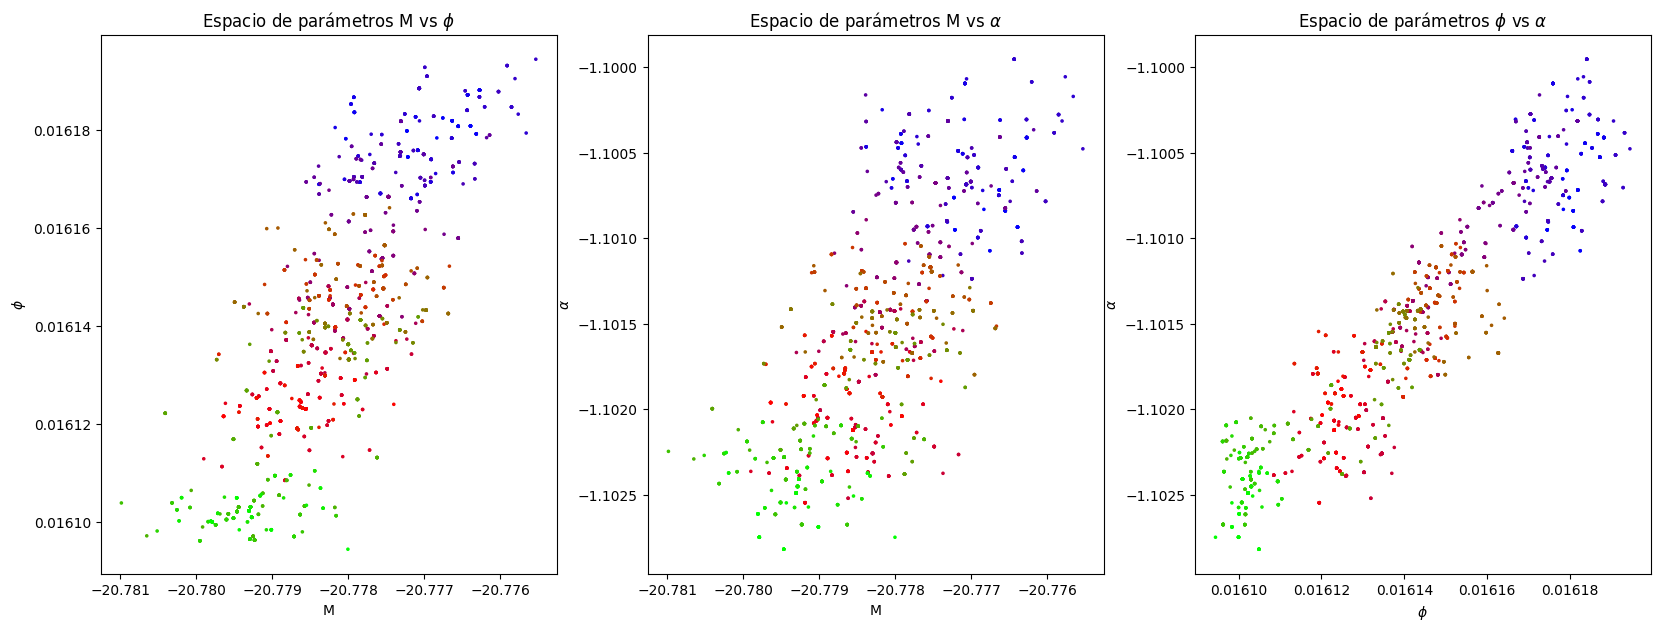

In [16]:
f, axs = plt.subplots(1, 3, figsize=(20, 7))

# Gráfico de M vs phi
axs[0].scatter(mcad[-2000:], phicad[-2000:],marker='.',s=10, c=range(2000), cmap='brg')
axs[0].set_xlabel('M')
axs[0].set_ylabel('$\phi$')
axs[0].set_title('Espacio de parámetros M vs $\phi$')

# Gráfico de M vs alpha
axs[1].scatter(mcad[-2000:], alphacad[-2000:], marker='.', s=10, c=range(2000), cmap='brg')
axs[1].set_xlabel('M')
axs[1].set_ylabel('$\\alpha$')
axs[1].set_title('Espacio de parámetros M vs $\\alpha$')

# Gráfico de phi vs alpha
axs[2].scatter(phicad[-2000:], alphacad[-2000:], marker='.', s=10, c=range(2000), cmap='brg')
axs[2].set_xlabel('$\phi$')
axs[2].set_ylabel('$\\alpha$')
axs[2].set_title('Espacio de parámetros $\phi$ vs $\\alpha$')

Text(0.5, 1.0, 'Valor de $\\alpha$ por paso')

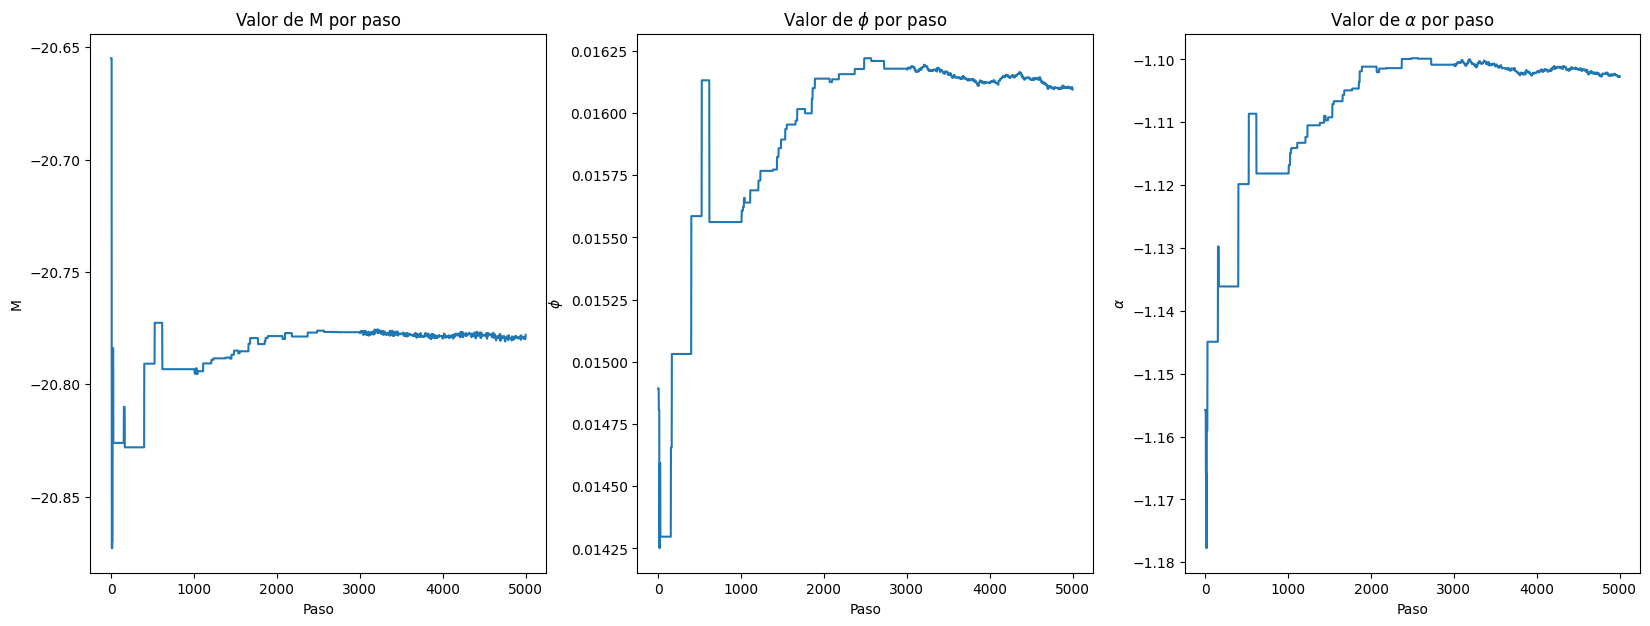

In [17]:
f, axs = plt.subplots(1, 3, figsize=(20, 7))

#Valor por cada paso
axs[0].plot(mcad)
axs[0].set_xlabel('Paso')
axs[0].set_ylabel('M')
axs[0].set_title('Valor de M por paso')

axs[1].plot(phicad)
axs[1].set_xlabel('Paso')
axs[1].set_ylabel('$\phi$')
axs[1].set_title('Valor de $\phi$ por paso')

axs[2].plot(alphacad)
axs[2].set_xlabel('Paso')
axs[2].set_ylabel('$\\alpha$')
axs[2].set_title('Valor de $\\alpha$ por paso')


In [24]:
mbueno = np.sum(mcad[-2000:])/2000
phibueno = np.sum(phicad[-2000:])/2000
alphabueno = np.sum(alphacad[-2000:])/2000
print(mbueno, phibueno, alphabueno)

-20.77814603439193 0.016141153740790885 -1.1015282525168226
